In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score


In [2]:
data = pd.read_csv("C:\\Users\\Divyaditya Bhardwaj\\Desktop\\big project\\combined_data\\combined_data_full.csv")


In [3]:
link_number_counts = data[' Day Type ID'].value_counts()

print(link_number_counts)

 Day Type ID
5     59180
6     59088
2     44468
4     44452
3     44200
0     44184
1     42196
9     38160
11    13240
7     13232
12     7296
13     3432
14     2304
Name: count, dtype: int64


In [4]:
mapping = {
    'AL1187': 1,
    'AL1212': 2,
    'AL1073': 3,
    'AL2950': 4
    
}

data['Link Number'] = data[' HATRIS Link Number'].map(mapping)

In [5]:
data =data.drop([' HATRIS Link Number'],axis = 1)
import pandas as pd


date_format = "%d/%m/%Y"

time_format = "%H:%M:%S"

data['Datetime'] = pd.to_datetime(data['Local Date'] + ' ' + data[' Local Time'], format=date_format + ' ' + time_format)

data = data.drop(['Local Date', ' Local Time'], axis=1)

data = data.drop([' Carriageway', ' HATRIS Link Description',' Quality Index',' Road' ] , axis=1)


In [7]:
df = data

In [8]:
df

,Day Type ID,Link Length,Total Traffic Flow,Travel Time,Fused Average Speed,Link Number,Datetime
0,14,2940.000057,13.50,98.98,106.93,3,2006-01-01 00:00:00
1,14,2940.000057,13.50,100.91,104.89,3,2006-01-01 00:15:00
2,14,2940.000057,13.50,95.89,110.38,3,2006-01-01 00:30:00
3,14,2940.000057,13.50,92.10,114.92,3,2006-01-01 00:45:00
4,14,2940.000057,17.75,102.56,103.19,3,2006-01-01 01:00:00
...,...,...,...,...,...,...,...
415427,13,6719.999790,24.25,252.55,95.79,4,2008-12-31 22:45:00
415428,13,6719.999790,17.25,240.26,100.69,4,2008-12-31 23:00:00
415429,13,6719.999790,17.25,239.27,101.11,4,2008-12-31 23:15:00
415430,13,6719.999790,17.25,240.18,100.72,4,2008-12-31 23:30:00


Epoch 1/10
10386/10386 [==============================] - 43s 4ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 2/10
10386/10386 [==============================] - 39s 4ms/step - loss: 9.4695e-04 - val_loss: 8.3688e-04
Epoch 3/10
10386/10386 [==============================] - 38s 4ms/step - loss: 8.4284e-04 - val_loss: 8.1646e-04
Epoch 4/10
10386/10386 [==============================] - 38s 4ms/step - loss: 7.8012e-04 - val_loss: 8.5793e-04
Epoch 5/10
10386/10386 [==============================] - 44s 4ms/step - loss: 7.5488e-04 - val_loss: 6.6746e-04
Epoch 6/10
10386/10386 [==============================] - 46s 4ms/step - loss: 7.1631e-04 - val_loss: 6.8419e-04
Epoch 7/10
10386/10386 [==============================] - 46s 4ms/step - loss: 6.9649e-04 - val_loss: 6.7179e-04
Epoch 8/10
10386/10386 [==============================] - 45s 4ms/step - loss: 6.8504e-04 - val_loss: 7.0646e-04
Epoch 9/10
10386/10386 [==============================] - 48s 5ms/step - loss: 6.7743e-04 - val_loss: 6.

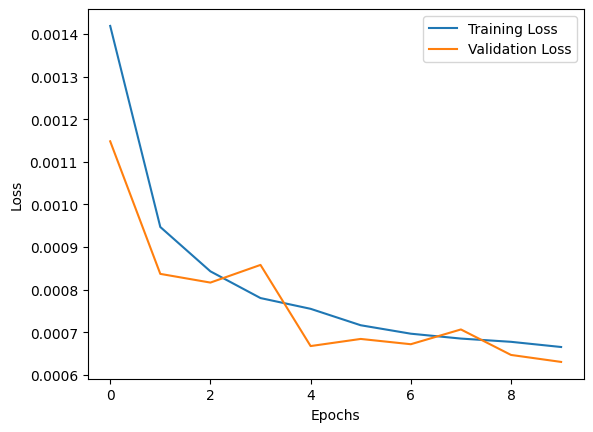

2597/2597 [==============================] - 6s 2ms/step
Root Mean Squared Error (RMSE): 26.25318976138212
R-squared (R2) Score for LSTM model: 0.9856106136545953


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping



# Extract relevant columns
data = df[[' Total Traffic Flow']].values.astype(float)

# Normalize the data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Define a function to create sequences for RNN
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length (number of time steps to look back)
seq_length = 10

X, y = create_sequences(data, seq_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an RNN model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Plot the loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)


r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score for LSTM model:", r2)


C:\Users\Divyaditya Bhardwaj\AppData\Local\Temp\ipykernel_22844\1447031818.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label="Actual" , shade=True)
C:\Users\Divyaditya Bhardwaj\AppData\Local\Temp\ipykernel_22844\1447031818.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred.flatten(), label="Predicted" , shade=True)


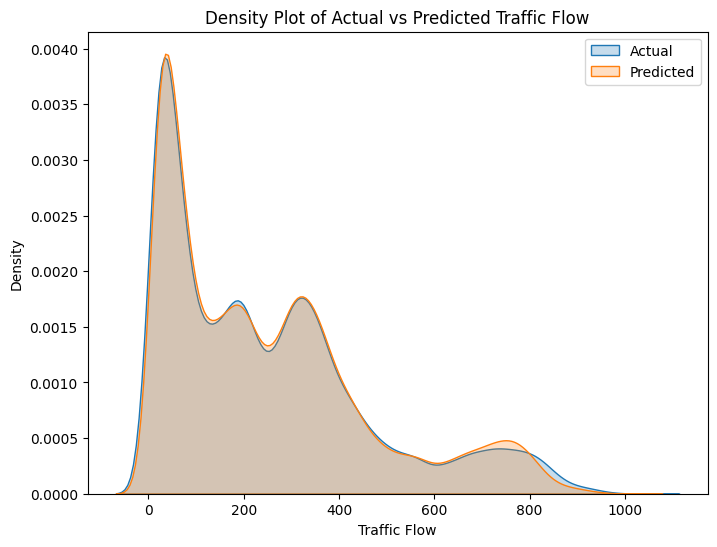

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, label="Actual" , shade=True)
sns.kdeplot(y_pred.flatten(), label="Predicted" , shade=True)
plt.xlabel("Traffic Flow")
plt.ylabel("Density")
plt.title("Density Plot of Actual vs Predicted Traffic Flow")
plt.legend()
plt.show()


Epoch 1/10
10386/10386 [==============================] - 55s 5ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 2/10
10386/10386 [==============================] - 52s 5ms/step - loss: 8.9038e-04 - val_loss: 7.7494e-04
Epoch 3/10
10386/10386 [==============================] - 55s 5ms/step - loss: 7.8723e-04 - val_loss: 7.6650e-04
Epoch 4/10
10386/10386 [==============================] - 53s 5ms/step - loss: 7.4288e-04 - val_loss: 7.0252e-04
Epoch 5/10
10386/10386 [==============================] - 52s 5ms/step - loss: 7.2150e-04 - val_loss: 7.0443e-04
Epoch 6/10
10386/10386 [==============================] - 54s 5ms/step - loss: 7.0578e-04 - val_loss: 6.6084e-04
Epoch 7/10
10386/10386 [==============================] - 49s 5ms/step - loss: 6.9157e-04 - val_loss: 6.6877e-04
Epoch 8/10
10386/10386 [==============================] - 50s 5ms/step - loss: 6.8035e-04 - val_loss: 6.5931e-04
Epoch 9/10
10386/10386 [==============================] - 50s 5ms/step - loss: 6.7126e-04 - val_loss: 6.

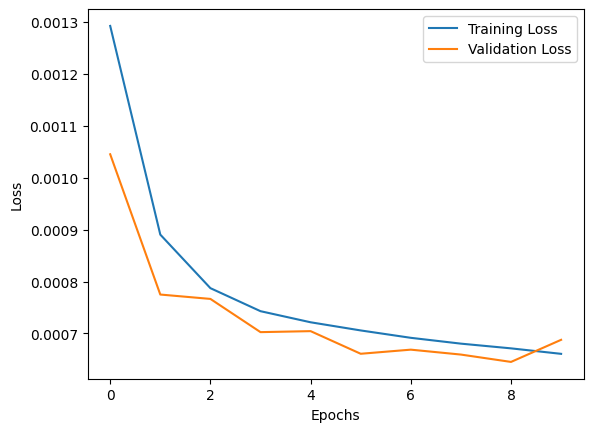

2597/2597 [==============================] - 5s 2ms/step
Root Mean Squared Error (RMSE): 27.424152138086825
R-squared (R2) Score for LSTM model: 0.984298377314538


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping




data = df[[' Total Traffic Flow']].values.astype(float)

scaler = MinMaxScaler()
data = scaler.fit_transform(data)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10

X, y = create_sequences(data, seq_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score for LSTM model:", r2)

C:\Users\Divyaditya Bhardwaj\AppData\Local\Temp\ipykernel_22844\1447031818.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label="Actual" , shade=True)
C:\Users\Divyaditya Bhardwaj\AppData\Local\Temp\ipykernel_22844\1447031818.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred.flatten(), label="Predicted" , shade=True)


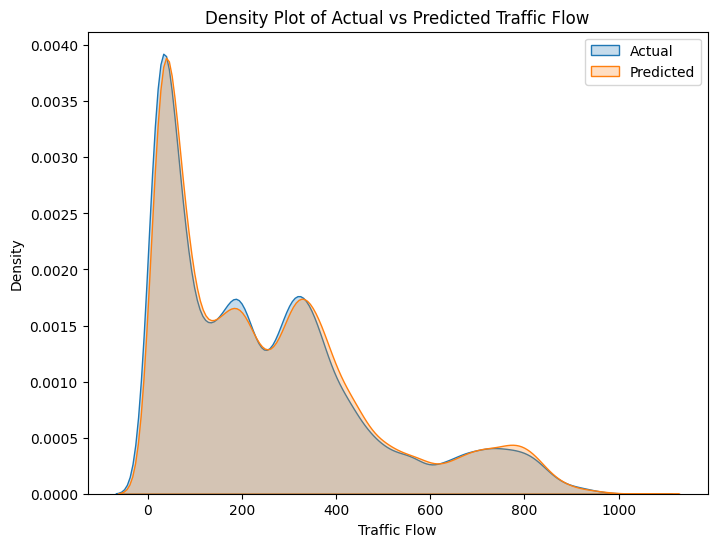

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, label="Actual" , shade=True)
sns.kdeplot(y_pred.flatten(), label="Predicted" , shade=True)
plt.xlabel("Traffic Flow")
plt.ylabel("Density")
plt.title("Density Plot of Actual vs Predicted Traffic Flow")
plt.legend()
plt.show()


Epoch 1/10
10386/10386 [==============================] - 70s 6ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 2/10
10386/10386 [==============================] - 65s 6ms/step - loss: 9.2640e-04 - val_loss: 7.6121e-04
Epoch 3/10
10386/10386 [==============================] - 64s 6ms/step - loss: 7.5741e-04 - val_loss: 7.1408e-04
Epoch 4/10
10386/10386 [==============================] - 64s 6ms/step - loss: 7.0512e-04 - val_loss: 6.4473e-04
Epoch 5/10
10386/10386 [==============================] - 64s 6ms/step - loss: 6.8077e-04 - val_loss: 6.5960e-04
Epoch 6/10
10386/10386 [==============================] - 60s 6ms/step - loss: 6.6102e-04 - val_loss: 6.4686e-04
Epoch 7/10
10386/10386 [==============================] - 55s 5ms/step - loss: 6.4827e-04 - val_loss: 6.2814e-04
Epoch 8/10
10386/10386 [==============================] - 56s 5ms/step - loss: 6.3398e-04 - val_loss: 6.1627e-04
Epoch 9/10
10386/10386 [==============================] - 59s 6ms/step - loss: 6.2585e-04 - val_loss: 5.

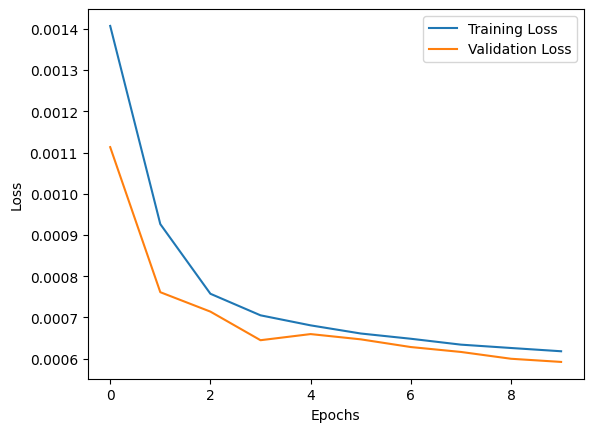

2597/2597 [==============================] - 6s 2ms/step
Root Mean Squared Error (RMSE): 25.44561928842082
R-squared (R2) Score for LSTM model: 0.9864822575402558


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping



data = df[[' Total Traffic Flow']].values.astype(float)

scaler = MinMaxScaler()
data = scaler.fit_transform(data)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10

X, y = create_sequences(data, seq_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score for LSTM model:", r2)


C:\Users\Divyaditya Bhardwaj\AppData\Local\Temp\ipykernel_22844\1447031818.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label="Actual" , shade=True)
C:\Users\Divyaditya Bhardwaj\AppData\Local\Temp\ipykernel_22844\1447031818.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred.flatten(), label="Predicted" , shade=True)


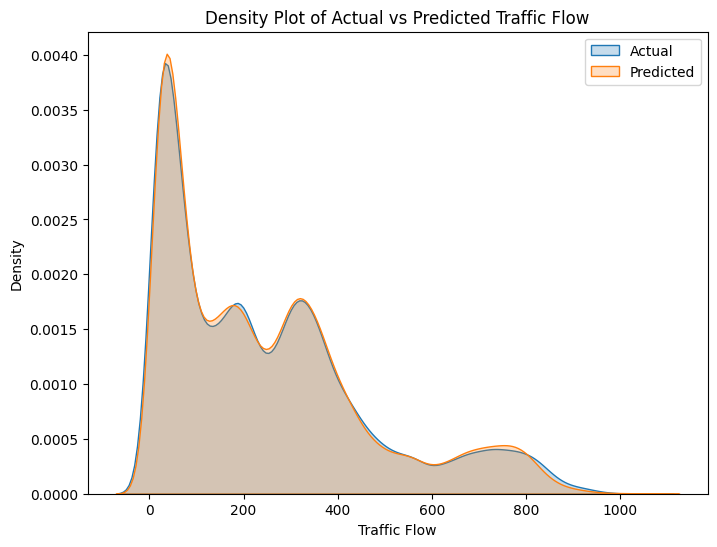

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, label="Actual" , shade=True)
sns.kdeplot(y_pred.flatten(), label="Predicted" , shade=True)
plt.xlabel("Traffic Flow")
plt.ylabel("Density")
plt.title("Density Plot of Actual vs Predicted Traffic Flow")
plt.legend()
plt.show()
